# Project - Data Science
![DS_steps.png](DS_steps.png)

## Fullname (nickname): Niphon Chanlen (Bird)


# Project Topic: IPST Online Teacher Professional Development about Buoancy: Did it work? Who succeeded and Who failed?

---
## Current Situation / Problem Statement

IPST offered a trial self-pace online course about buoyancy concept. There were more than 1,100 teachers registered for the course but only 50% completed it. The questions arises about the effectiveness of the course in preparing teachers teaching the buoyancy concept and the factors affecting the course completion of the participants.







## Objectives:
This study aim to provide evidence about the effectiveness of the online course about buoyancy concept and identify factors that might affect the course completion of the participants. Recommendations will be provided to help the course instructors to improve the course design in order to maintain the retention and improve the completion rate of participants, especially at-risk teachers. 

## Hypothesis-driven Questions:

1. Do teachers’ content knowledge and self-efficacy improve after the course completion?
2. Do teachers' prior content knowledge, self-efficacy and demographic e.g. gender, education level, teaching level, teaching experience affect their completion of the course?




## Dataset:
There are 2 main datasets
### 1. Teachers' background infomation: 'buoyancy_teacher_info.xlsx'
      1.1 Username
      1.2 EdBackground (educational background major)
      1.3 Phys_major (has physics major?)
      1.4 Teach_exp (number of years in teaching experience)
      1.5 EdLevel (highest educational background recieved)
      1.6 Teach_sub_gensci (teach general scinece: Yes/No)
      1.7 ระดับชั้นที่สอน (grade level of teaching)
      1.8 Teach_level (level of teaching)
      1.9 M2_teacher (teach grade 8: Yes/No)) 
### 2. Teachers' test score : buoyancy_teacher_score.xlsx
      2.1 Username
      2.2 pretest_concept (pretest scores in buoyancy)
      2.3 pre_selfefficacy (pretest scores in self efficacy questionnaire)
      2.4 posttest_concept (posttest scores in buoyancy)
      2.5 posttest_noitem  (number of submitted items in posttest)
      2.5 post_selfefficacy (posttest scores in self efficacy questionnaire)

## Exploring the first question: Do teachers’ content knowledge and self-efficacy improve after the course completion?

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#import file, working with one database
df_score = pd.read_excel('buoyancy_teacher_score.xlsx')


### Q1: Data Preparation (Data Cleaning)
1. Explore dataset and check for null value
2. Drop null values

In [80]:
#Checking heading and null value
print(df_score.head())
print("---------------------")
print(df_score.shape)
print("---------------------")
print(df_score.info())
print("---------------------")
print(df_score.isnull().mean()[df_score.isnull().sum() != 0]*100)

   Username  pretest_concept  posttest_noitem  posttest_concept  \
0         1              8.0              3.0               2.0   
1         2              5.0              NaN              14.0   
2         3              5.0              NaN               NaN   
3         4              5.0              3.0               1.0   
4         5              5.0             17.0              15.0   

   pre_selfefficacy  post_selfefficacy  
0              56.0                NaN  
1              58.0               57.0  
2              53.0                NaN  
3              63.0                NaN  
4              71.0               76.0  
---------------------
(696, 6)
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Username           696 non-null    int64  
 1   pretest_concept    635 non-null    float64
 2

In [86]:
#chane data type of Username to object
df_score["Username"]=df_score["Username"].values.astype('object') #change datatype to object

In [88]:
# Remove the unneccesary column
df_score.drop(columns=['posttest_noitem'], inplace=True)

In [90]:
# Since this analysis aims to make an inference about the effectiveness of the course by comparing
# mean score before and after the course , thus all null scores are dropped 
df_score.dropna(subset=['pretest_concept','post_selfefficacy','pre_selfefficacy'], inplace=True) #drop null value

### Q1 : Exploratory Data Analysis (EDA)

In [ ]:
Procedures: 
1. exploring simple statistic and data distribution of content knowledge and self-efficacy scores
2. computing correlation coefficient and plot correlation graph
3. comparing mean scores between pre-test and post-test 

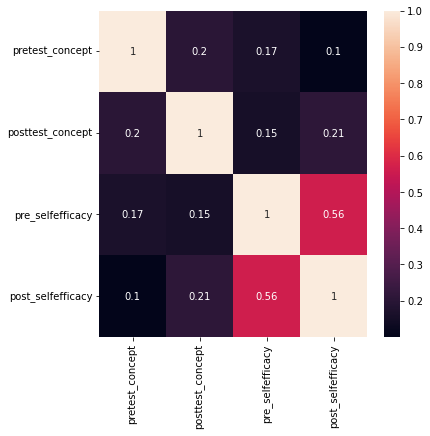

In [93]:
#computing correlation coefficient with heatmap as a visual representation
plt.figure(figsize = (6,6))
sns.heatmap(df_score.corr(), annot = True);

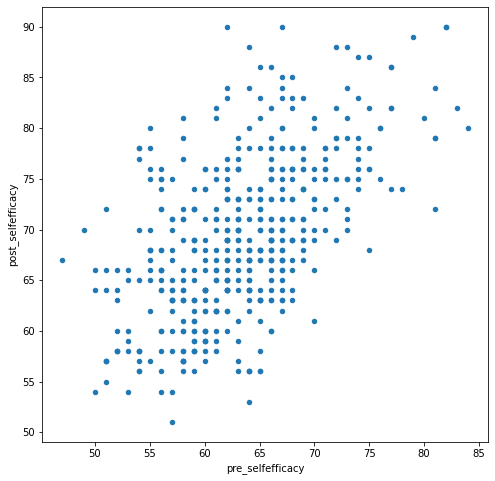

In [94]:
#scatter plot showing medium correlation (r=0.56) between pre and post self efficacy scores
df_score.plot(kind = 'scatter',figsize=(8,8), x = 'pre_selfefficacy', y = 'post_selfefficacy')
plt.show()

In [224]:
#calculate and compare average scores of pre and post test
A= df_score['pretest_concept'].mean()
B= df_score['posttest_concept'].mean()
C= df_score['pre_selfefficacy'].mean()
D= df_score['post_selfefficacy'].mean()

data = {
"Pretest": [A, C],
"Posttest": [B,D]
}
df_mean = pd.DataFrame(data, index = ["Buoyancy", "Self Efficacy"])
print(df_mean)

                 Pretest   Posttest
Buoyancy        6.812227  13.759825
Self Efficacy  63.436681  69.443231


In [225]:
#testing improvement of buoyancy concept scores using dependent sample t-test
from scipy.stats import ttest_rel
ttest_rel(df_score['pretest_concept'], df_score['posttest_concept'])

Ttest_relResult(statistic=-39.568845019122485, pvalue=1.0301707138794765e-149)

In [ ]:
#pvalue less than 0.01 indicating significant improvement in buoyancy concept scores

In [226]:
#testing improvement of self efficacy scores using dependent sample t-test
ttest_rel(df_score['pre_selfefficacy'], df_score['post_selfefficacy']) 

Ttest_relResult(statistic=-18.851543041212896, pvalue=4.579897050695367e-59)

In [ ]:
#pvalue less than 0.01 indicating significant improvement in bself efficacy scores

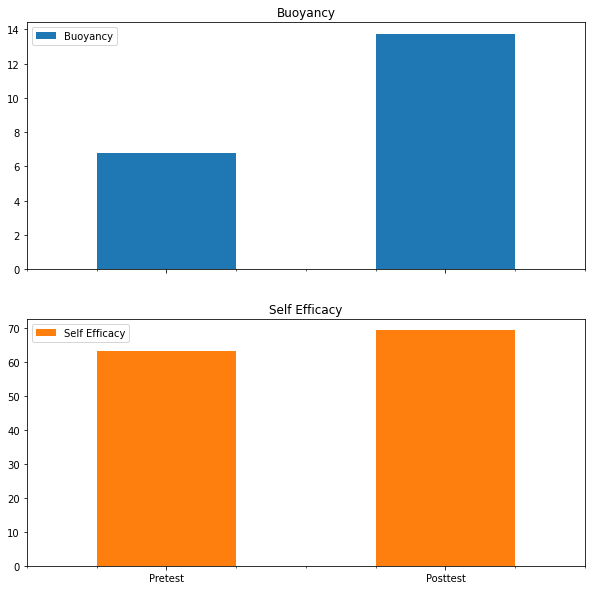

In [96]:
#visual representation of the improvement of the scores
df_mean_tran = df_mean.transpose()
ax = df_mean_tran.plot.bar(rot=0, subplots=True, figsize=(10,10))
plt.show() 

## Key Findings: Q1 Do teachers’ content knowledge and self-efficacy improve after the course completion?

There is medium correlation between teachers' pre and post self efficacy.
Dependent t-test suggests that both teachers' content knowledge and self efficacy significantly improve after completion of the professional development course.


# Exploring the second question:  Do teacher’s prior content knowledge, self-efficacy, and demogrphic e.g. gender, education level, teaching level, teaching experience affect their completion of the course?

In [97]:
#import files
df_info = pd.read_excel('buoyancy_teacher_info.xlsx')
df_score = pd.read_excel('buoyancy_teacher_score.xlsx')

#merge two database by matched "Username"
df = df_info.merge(df_score, how='left', on='Username')

##  Q2 : Data Preparation (Data Cleaning)

In [99]:
print(df.head())
print("---------------------")
print(df.shape)
print("---------------------")
print(df.info())
print("---------------------")
print(df.isnull().mean()[df.isnull().sum() != 0]*100)

   Username  EdBackground_code EdBackground Phys_major   Teach_exp    EdLevel  \
0         1                  3     Engineer        Yes         0-5     Master   
1         2                  4    Sci other         No  มากกว่า 20     Master   
2         3                  4    Sci other         No        6-10  Bachelor    
3         4                  3     Engineer        Yes        6-10  Bachelor    
4         5                  6    Ed nonsci         No       11-15     Master   

  Teach_sub_gensci     ระดับชั้นที่สอน      Teach_level M2_teacher  \
0               No              อื่น ๆ            Other         No   
1              Yes  ป.6, ม.1, ม.2, ม.3  lower secondary        Yes   
2              Yes                 ม.1  lower secondary         No   
3              Yes       ป.4, ป.5, ป.6          Primary         No   
4              Yes       ป.4, ป.5, ป.6          Primary         No   

   pretest_concept  posttest_noitem  posttest_concept  pre_selfefficacy  \
0              8.

In [289]:
#change type of Username data to string
df["Username"]=df["Username"].values.astype('object')

In [290]:
#drop irrelevant columns 
df.drop(['EdBackground_code','posttest_concept','post_selfefficacy','ระดับชั้นที่สอน'], axis=1, inplace=True)

In [291]:
#change font from Thai to English
df.replace(to_replace="มากกว่า 20", value=" More than 20", inplace=True)

In [101]:
#since this analysis aims to explore the effects of interested variables in the completion of the course, 
#thus null value of pretest_concept','posttest_noitem and pre_selfefficacy are dropped
#null value of Teach_exp are dropped because the number of null value is very small
df.dropna(subset=['pretest_concept','posttest_noitem','Teach_exp','pre_selfefficacy'], inplace=True)

## Q2 : Exploratory Data Analysis (EDA)
1. Checking simple statistic and data distribution.
2. Grouping teachers into two groups (succeed and dropout) based on their course completion. 
3. Grouping teachers into two groups (Low and High) based on their pre buoyancy concept.
4. Grouping teachers into two groups (Low and High) based on their pre self efficacy score.
5. Preliminary looking at factors afftecting course completion.

#### Section 1: checking simple statistic and data distribution

In [293]:
#Exploring simple statistic and data distribution
print(df.describe().round(2))

       Username  pretest_concept  posttest_noitem  pre_selfefficacy
count    512.00           512.00           512.00            512.00
mean     348.14             6.68            16.09             63.38
std      200.09             3.08             3.05              6.45
min        1.00             1.00             3.00             47.00
25%      177.75             5.00            17.00             59.00
50%      345.50             6.00            17.00             63.00
75%      522.25             8.00            17.00             67.00
max      696.00            16.00            17.00             84.00


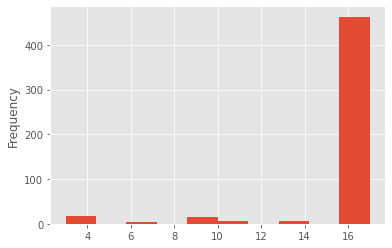

In [194]:
#Checking data distribution using histrogram 
df['posttest_noitem'].plot(kind = 'hist')
plt.show()

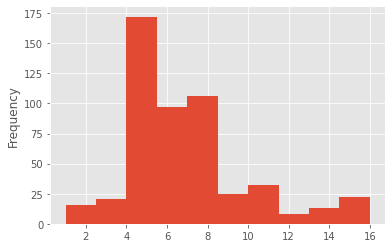

In [195]:
df['pretest_concept'].plot(kind = 'hist')
plt.show()

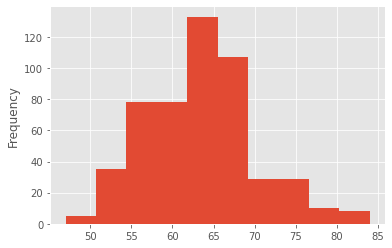

In [196]:
df['pre_selfefficacy'].plot(kind = 'hist')
plt.show()

In [294]:
#Grouping teachers into two groups (succeed and dropout) based on their course completion.
#succeed teachers completed all pre-tests and all 17 post test items in buoyancy while dropout teachers did not complete all 17 post test items
#identify conditions in grouping 
SuccCondition = [
    (df['posttest_noitem'] < 17),
    (df['posttest_noitem'] == 17)
]
value = ['dropout','succeed'] #identify assigned value 
df['Success'] = np.select(SuccCondition,value) #apply condition to value
df.value_counts('Success')

Success
succeed    463
dropout     49
dtype: int64

In [295]:
#Grouping teachers into two groups (Low and High) based on their pre buoyancy concept.
#identify condition in grouping
x= df['pretest_concept'].mean()
PretestCondition = [
    (df['pretest_concept'] < x),
    (df['pretest_concept'] >= x)
]
value = ['Low Pretest','High Pretest'] #identify assigned value 
df['Pre Test Level'] = np.select(PretestCondition,value) #apply condition to value
df.value_counts('Pre Test Level')

Pre Test Level
Low Pretest     306
High Pretest    206
dtype: int64

In [296]:
#Grouping teachers into two groups (Low and High) based on their pre self efficacy score.
#identify condition in grouping
y= df['pre_selfefficacy'].mean()
PreSelfEffCondition = [
    (df['pre_selfefficacy'] < y),
    (df['pre_selfefficacy'] >= y)
]
value = ['Low SelfEff','High SelfEff'] #identify assigned value 
df['Pre Self Efficacy Level'] = np.select(PreSelfEffCondition,value) #apply condition to value
df.value_counts('Pre Self Efficacy Level')

Pre Self Efficacy Level
Low SelfEff     266
High SelfEff    246
dtype: int64

#### Preliminary looking at factors afftecing course completion.

In [302]:
#getting a list of all column names
column_names = df.columns.values.tolist()
print(column_names)

['Username', 'EdBackground', 'Phys_major', 'Teach_exp', 'EdLevel', 'Teach_sub_gensci', 'Teach_level', 'M2_teacher', 'pretest_concept', 'posttest_noitem', 'pre_selfefficacy', 'Success', 'Pre Test Level', 'Pre Self Efficacy Level']


In [303]:
#identify selected column names that will be used in this analysis
column_names = ['EdBackground', 'Phys_major', 'Teach_exp', 'EdLevel', 'Teach_sub_gensci', 'Teach_level', 'M2_teacher', 'Pre Test Level', 'Pre Self Efficacy Level']
print(column_names)

['EdBackground', 'Phys_major', 'Teach_exp', 'EdLevel', 'Teach_sub_gensci', 'Teach_level', 'M2_teacher', 'Pre Test Level', 'Pre Self Efficacy Level']


                      Username
Success EdBackground          
dropout Ed Sci other        21
        Ed nonsci            7
        Ed phys              2
        Engineer             2
        Non Sci              3
        Sci other           14
succeed Ed Sci other       209
        Ed nonsci           61
        Ed phys             13
        Engineer             6
        Non Sci              8
        Sci Phys            17
        Sci other          149
                       Username
Success EdBackground           
dropout Ed Sci other  42.857143
        Ed nonsci     14.285714
        Ed phys        4.081633
        Engineer       4.081633
        Non Sci        6.122449
        Sci other     28.571429
succeed Ed Sci other  45.140389
        Ed nonsci     13.174946
        Ed phys        2.807775
        Engineer       1.295896
        Non Sci        1.727862
        Sci Phys       3.671706
        Sci other     32.181425
['Ed Sci other' 'Ed nonsci' 'Ed phys' 'Engineer' 'Non S

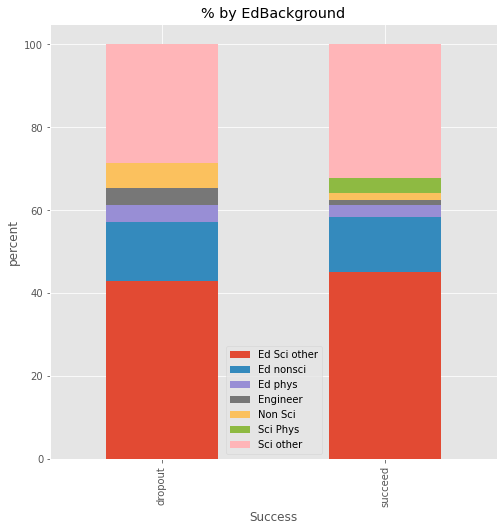

---------------------------
---------------------------
---------------------------
                    Username
Success Phys_major          
dropout No                45
        Yes                4
succeed No               427
        Yes               36
                     Username
Success Phys_major           
dropout No          91.836735
        Yes          8.163265
succeed No          92.224622
        Yes          7.775378
['No' 'Yes']


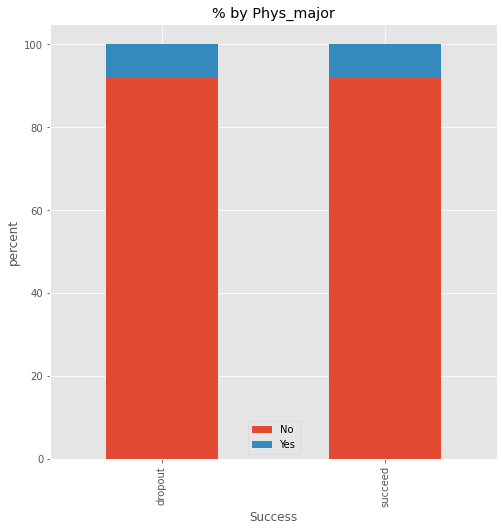

---------------------------
---------------------------
---------------------------
                       Username
Success Teach_exp              
dropout  More than 20         2
        0-5                  20
        11-15                 6
        16-20                 4
        6-10                 17
succeed  More than 20        57
        0-5                 177
        11-15                58
        16-20                42
        6-10                129
                        Username
Success Teach_exp               
dropout  More than 20   4.081633
        0-5            40.816327
        11-15          12.244898
        16-20           8.163265
        6-10           34.693878
succeed  More than 20  12.311015
        0-5            38.228942
        11-15          12.526998
        16-20           9.071274
        6-10           27.861771
[' More than 20' '0-5' '11-15' '16-20' '6-10']


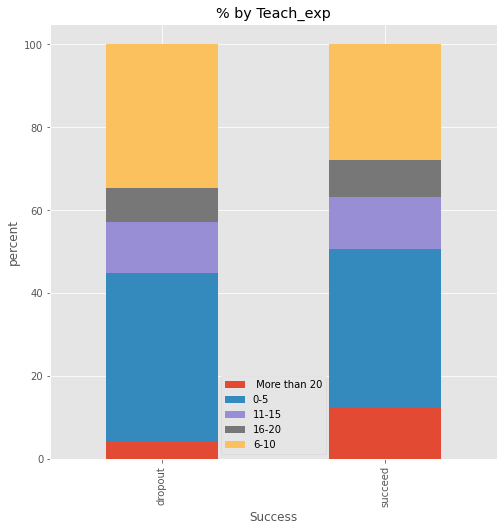

---------------------------
---------------------------
---------------------------
                   Username
Success EdLevel            
dropout Bachelor         34
        Master           15
succeed Bachelor        292
        Master          165
        Phd               5
        other             1
                    Username
Success EdLevel             
dropout Bachelor   69.387755
        Master     30.612245
succeed Bachelor   63.066955
        Master     35.637149
        Phd         1.079914
        other       0.215983
['Bachelor ' 'Master' 'Phd' 'other']


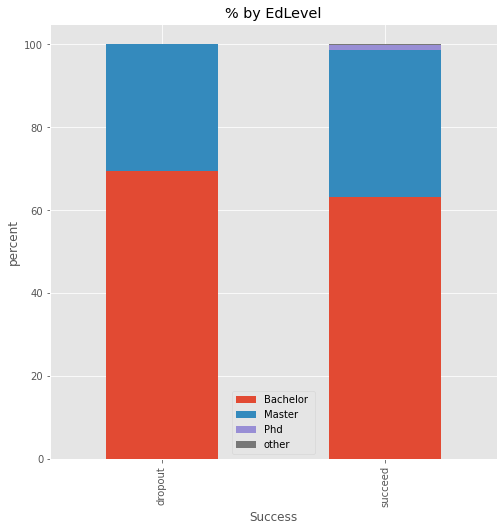

---------------------------
---------------------------
---------------------------
                          Username
Success Teach_sub_gensci          
dropout No                       9
        Yes                     40
succeed No                      67
        Yes                    396
                           Username
Success Teach_sub_gensci           
dropout No                18.367347
        Yes               81.632653
succeed No                14.470842
        Yes               85.529158
['No' 'Yes']


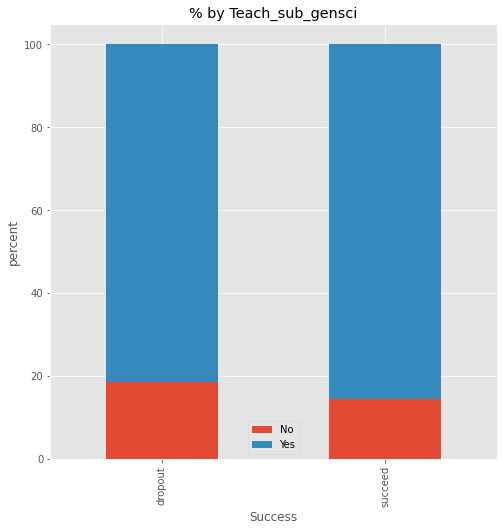

---------------------------
---------------------------
---------------------------
                         Username
Success Teach_level              
dropout Other                   4
        Primary                17
        lower secondary        28
succeed Other                  62
        Primary               114
        lower secondary       287
                          Username
Success Teach_level               
dropout Other             8.163265
        Primary          34.693878
        lower secondary  57.142857
succeed Other            13.390929
        Primary          24.622030
        lower secondary  61.987041
['Other' 'Primary' 'lower secondary']


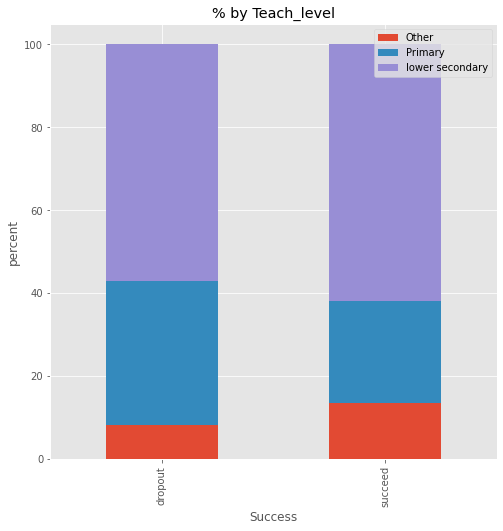

---------------------------
---------------------------
---------------------------
                    Username
Success M2_teacher          
dropout No                33
        Yes               16
succeed No               275
        Yes              188
                     Username
Success M2_teacher           
dropout No          67.346939
        Yes         32.653061
succeed No          59.395248
        Yes         40.604752
['No' 'Yes']


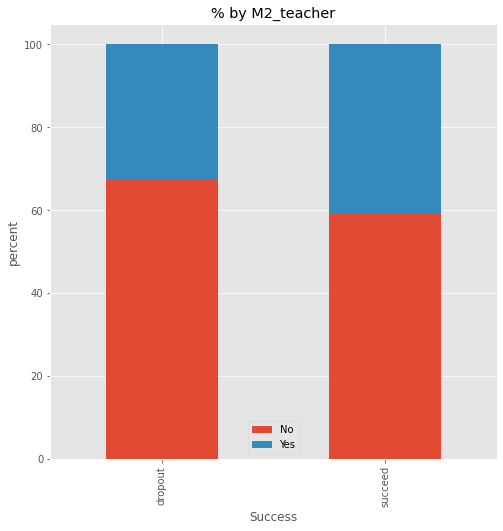

---------------------------
---------------------------
---------------------------
                        Username
Success Pre Test Level          
dropout High Pretest          15
        Low Pretest           34
succeed High Pretest         191
        Low Pretest          272
                         Username
Success Pre Test Level           
dropout High Pretest    30.612245
        Low Pretest     69.387755
succeed High Pretest    41.252700
        Low Pretest     58.747300
['High Pretest' 'Low Pretest']


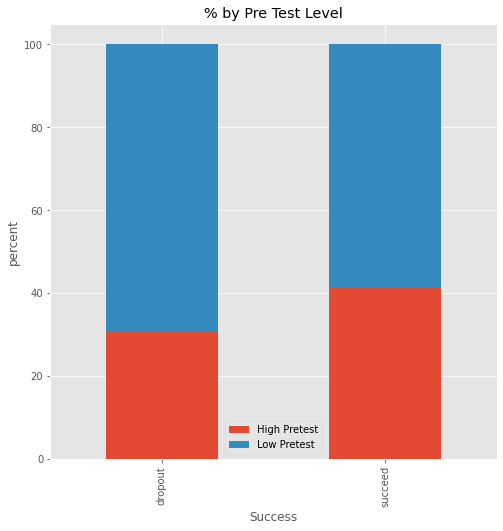

---------------------------
---------------------------
---------------------------
                                 Username
Success Pre Self Efficacy Level          
dropout High SelfEff                   23
        Low SelfEff                    26
succeed High SelfEff                  223
        Low SelfEff                   240
                                  Username
Success Pre Self Efficacy Level           
dropout High SelfEff             46.938776
        Low SelfEff              53.061224
succeed High SelfEff             48.164147
        Low SelfEff              51.835853
['High SelfEff' 'Low SelfEff']


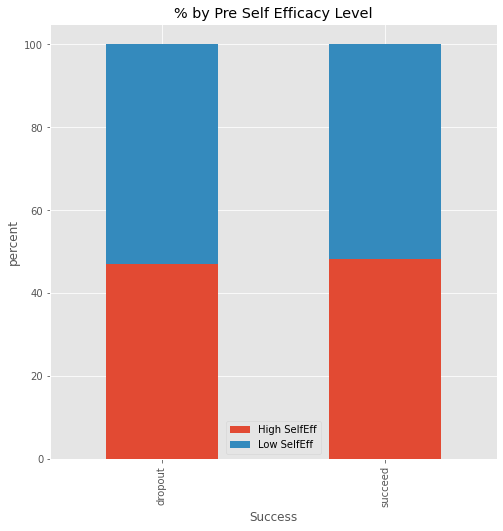

---------------------------
---------------------------
---------------------------


In [305]:
#using for loop to analyse the same process with all item in column_names
for items in column_names:
  df2 = df.groupby(['Success', items]).agg({'Username': 'count'}) #group by success and interested variable (each column name in items) then count number of teacher
  print(df2)
  df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #convert number of teacher into percentage
  print(df3)
  a = df[items].unique()  #getting a list of unique values in each items
  a.sort()
  print(a)
  plt.style.use('ggplot')
    
  df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))   #plot a stack bar graph
  for unique_values in a:  #create legend from a list of unique values in each items
    plt.legend(a)
    
  plt.title("% by " + items)
  plt.ylabel("percent")
  plt.show()
  print("---------------------------")
  print("---------------------------")
  print("---------------------------")

## Key Findings: Q2 Do teacher’s prior content knowledge, self-efficacy and demogrphic e.g. gender, education level, teaching level, teaching experience affect their completion of the course?


1. There seems to be no difference in percentages of teachers who dropped out and completed the course aggregated by their physics major or their self efficacy level.
2. These variables; Educational background, teaching experience, Highest education level, teaching subject, teaching level, and pre-test score seem to have impact on whether the participants will complete the course. 

        2.1 Teachers who have educational background in science related fields such as environment science, logistic tend not to drop out but teachers who has background in non-science such as Thai language dropped out more.
        2.2 Teachers who have 6-10 years teaching experience seemed to drop out more.
        2.3 Teachers who has higher degree in education tend not to drop out.
        2.4 General science subject teachers, especially teachers who are teaching in 8th grade or lower secondary school tend to not drop out comparing to teachers who teaches in primary school level or teaches non-science subjects.
        2.5 Teachers who has higher scores in their pre-test buoyancy concept tend not to drop out comparing to teachers who has lower scores.


# recommendation

The course is effective in significantly improving teachers' understanding about buoyancy concept and self efficacy. However, there seems to be indicatations implying that the online professional development is difficult to some group of teachers, thus we reccommend that 
1. Clearly specify and highlight the purposes and intended audiences of the course.
2. Use pre-test scores of the buoyancy concept as prerequisite. Only teachers who pass the cut scores can attend this course.
3. Improve scaffolding structure of the course 
4. Develop an alternative course  with simpler concept, more scaffolding and more helps during lesson 
5. Gather more evidences (time spending, number of attempt)
